In [ ]:
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk                         # Natural Language Toolkit
nltk.download('stopwords')          # Download stopwords data
from nltk.corpus import stopwords  # Stopwords corpus for text processing
from nltk.stem import SnowballStemmer  # Snowball stemming algorithm for text processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


# Clone the dataset repository from GitHub
!git clone https://github.com/chanchalIITP/AuthorIdentification.git
# Load the dataset from GitHub
files_path = r'/content/AuthorIdentification/Dataset/Dataset_with_varying_number_of_tweets/1000_tweets_per_user.csv'
# Read the dataset from a CSV file
dataset = pd.read_csv(files_path)


Cloning into 'AuthorIdentification'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 17.55 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
dataset.rename(columns={'0': 'Text',
                   '1': 'Author'},
          inplace=True, errors='raise')

In [ ]:
# Define the number of samples to select from each class
num_samples = 900

# Get the unique class labels in the dataframe
unique_classes = dataset['Author'].unique()

# Create an empty list to store the sampled rows
sampled_rows = []

# For each unique class, randomly sample the desired number of rows
for cls in unique_classes:
    rows = dataset.loc[dataset['Author'] == cls]
    sampled = rows.sample(n=num_samples, replace=True, random_state=123)
    sampled_rows.append(sampled)

# Combine the sampled rows into a new dataframe
df_sampled = pd.concat(sampled_rows)

# Display the sampled dataframe
dataset=df_sampled

In [5]:

# Perform data preprocessing
nltk.download('wordnet')
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)
#Apply preprocessing to the dataset
dataset['Text'] = dataset['Text'].apply(preprocess_text)


# Split the dataset into features (content) and target variable (author)
features = dataset['Text']
target = dataset['Author']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a list to store the results
results = []

# Define a pipeline for each classifier with different vectorizers
classifiers = [
    ('Decision Tree', [
   ('BoW', CountVectorizer()),
        ('TF-IDF', TfidfVectorizer()),
        ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
        ('Combined (TF-IDF + N-gram (1, 3))',TfidfVectorizer(ngram_range=(1, 3))),
        ('Combined (TF-IDF + N-gram (2, 3))',TfidfVectorizer(ngram_range=(2, 3))),
        ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
], DecisionTreeClassifier()),


   ('Logistic Regression', [
   ('BoW', CountVectorizer()),
      ('TF-IDF', TfidfVectorizer()),
        ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
        ('Combined (TF-IDF + N-gram (1, 3))',TfidfVectorizer(ngram_range=(1, 3))),
        ('Combined (TF-IDF + N-gram (2, 3))',TfidfVectorizer(ngram_range=(2, 3))),
        ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
    ], LogisticRegression())
]

# Train and evaluate each classifier with different vectorizers
for name, vectorizers, classifier in classifiers:
    for vectorizer_name, vectorizer in vectorizers:
        # Define the pipeline for the classifier and vectorizer combination
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])

        # Train the classifier
        model = pipeline
        model.fit(X_train, y_train)

        # Predict the author for the test set
        predictions = model.predict(X_test)

        # Evaluate the accuracy of the model
        accuracy = accuracy_score(y_test, predictions)

        # Compute and print the confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"Confusion Matrix for {name} with {vectorizer_name}:\n{cm}")

        # Add the results to the list
        results.append({'Classifier': name, 'Feature Representation': vectorizer_name, 'Accuracy': accuracy})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the summarized results
print("\nResults Summary:")
print(results_df)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Confusion Matrix for Decision Tree with BoW:
[[150   0   0 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  0   0 133 ...   0   0   0]
 ...
 [  0   0   0 ... 140   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Decision Tree with TF-IDF:
[[144   0   1 ...   0   0   0]
 [  0 171   0 ...   0   0   0]
 [  2   0 131 ...   0   0   0]
 ...
 [  0   0   0 ... 135   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Decision Tree with Ngram (1,2):
[[149   0   1 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  0   0 136 ...   0   0   0]
 ...
 [  0   0   0 ... 138   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Decision Tree with Combined (TF-IDF + N-gram (1, 3)):
[[146   0   1 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  0   0 135 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion M

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with BoW:
[[159   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  2   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 147   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with TF-IDF:
[[155   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  1   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 146   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Ngram (1,2):
[[162   0   0 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  3   0 141 ...   0   0   0]
 ...
 [  0   0   0 ... 147   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Combined (TF-IDF + N-gram (1, 3)):
[[155   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  1   2 138 ...   0   0   0]
 ...
 [  0   0   0 ... 143   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Combined (TF-IDF + N-gram (2, 3)):
[[117   5   0 ...   0   0   0]
 [  0 138   1 ...   0   0   0]
 [  2   0 104 ...   0   0   0]
 ...
 [  0   0   0 ... 137   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Combined (TF-IDF + N-gram (1, 4)):
[[155   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  1   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 143   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]

Results Summary:
             Classifier             Feature Representation  Accuracy
0         Decision Tree                                BoW  0.840333
1         Decision Tree                             TF-IDF  0.814889
2         Decision Tree                        Ngram (1,2)  0.839444
3         Decision Tree  Combined (TF-IDF + N-gram (1, 3))  0.780111
4         Decision Tree  Combined (TF-IDF + N-gram (2, 3))  0.670444
5         Decision Tree  Combined (TF-IDF + N-gram (1, 4))  0.778333
6   Logistic Regression                                BoW  0.890111
7   Logistic Regression                             TF-IDF  0.872222
8   Logistic Regression                        Ngram (1,2)  0.890000
9   Logistic Regres

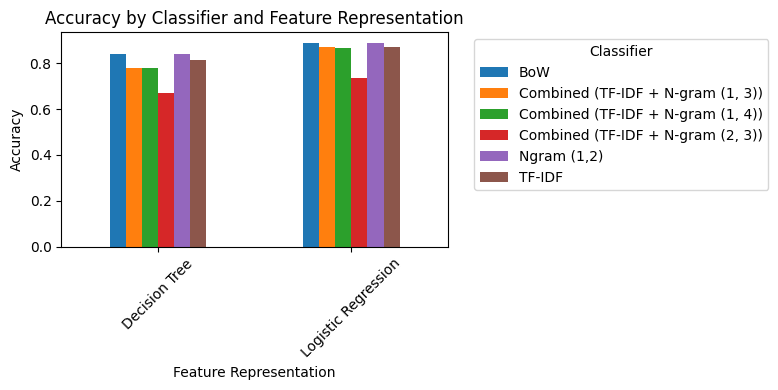

In [8]:
import matplotlib.pyplot as plt
# Create a pivot table for plotting
pivot_table = results_df.pivot_table(columns='Feature Representation', index='Classifier', values='Accuracy')

# Plot
pivot_table.plot(kind='bar', figsize=(8, 4))
plt.title('Accuracy by Classifier and Feature Representation')
plt.xlabel('Feature Representation')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



In [7]:
# Saving and loading models
import pickle                           # For saving and loading models
from keras.models import load_model     # For loading saved Keras models
pickle.dump(classifier, open("MLmodel3.pkl", "wb"))